In [2]:
import scipy.integrate as integrate
import scipy.optimize as optimize
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import rcParams
from mpl_toolkits.axes_grid1.inset_locator import inset_axes

In [3]:
rcParams['mathtext.fontset'] = 'stix'
rcParams['font.family'] = 'STIXGeneral'

data = pd.read_csv('C:\\Users\\marlo\\OneDrive - Universidad de los andes\\Documentos\\202320\\Laboratorio intermedio\\2. Doble rendija\\Laser\\Rendija derecha-Laser.csv',sep=';')
data_z= data['m'].to_numpy()
data_I= data['V'].to_numpy()

def integral(f_r, f_i, a, b):
    real = integrate.quad(f_r, a, b)
    im = integrate.quad(f_i, a, b)
    return complex(real[0], im[0])

# Parametros
a= 0.0001
x= 0
d= 0.000457
D1= 0.5
D2= 0.5

In [4]:
def f_f_der(z,lambda_r,b,d):
    I_der=[]
    z=z-d
    for i in range(len(z)):    
        # Intensidad
        di_real= lambda y: np.cos(np.pi/(D1*lambda_r)*(x-y)**2 + np.pi/(D2*lambda_r)*(z[i]-d-y)**2)
        di_img= lambda y: np.sin(np.pi/(D1*lambda_r)*(x-y)**2 + np.pi/(D2*lambda_r)*(z[i]-d-y)**2)
        i_der= np.exp(2*np.pi*1j*(D1+D2)/lambda_r)*integral(di_real, di_img, d/2-a/2, d/2+a/2)
        I_der.append(abs(i_der)**2)
    return b*np.array(I_der)
    
def f_fr_sencilla(z,lambda_r,b):
    return b*np.cos(np.pi/lambda_r*d*np.sin(z))**2

In [5]:
guess_0=[630e-9,1e8,0]
guess_1=[10000e-9,1e8]
parametros_f, covarianza_f = optimize.curve_fit(f_f_der, data_z, data_I, p0=guess_0)
parametros_fr, covarianza_fr = optimize.curve_fit(f_fr_sencilla, data_z, data_I, p0=guess_1)
incertidumbre_f = np.sqrt(np.diag(covarianza_f))
incertidumbre_fr = np.sqrt(np.diag(covarianza_fr))
print(parametros_f) 
print(incertidumbre_f)
print(parametros_fr) 
print(incertidumbre_fr)

[1.47161923e-06 1.45305170e+08 8.48289578e-07]
[1.75482479e-09 1.60528618e+05 1.15208707e-06]
[6.12688336e-06 1.43261508e+00]
[1.54012379e-08 3.58450951e-03]


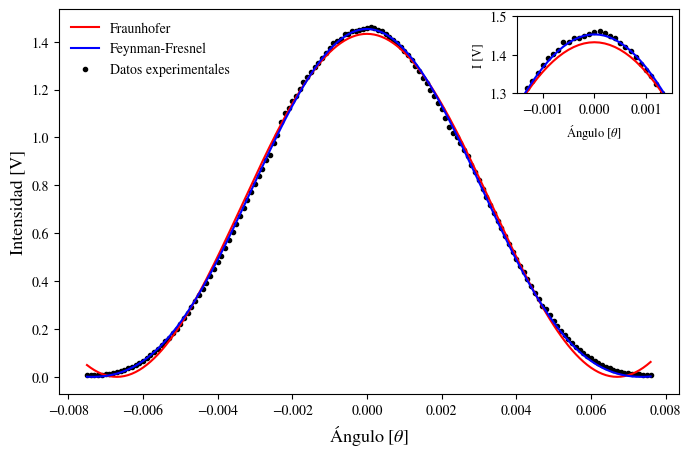

In [6]:
fig, ax1 = plt.subplots(figsize=(8, 5))

ax1.set_xlabel(r'Ángulo $[\theta]$', fontsize=13, color='black')
ax1.set_ylabel('Intensidad [V]', fontsize=13, color='black')
ax1.tick_params(axis='both', colors='black')
ax1.spines['bottom'].set_color('black')
ax1.spines['top'].set_color('black')
ax1.spines['left'].set_color('black')
ax1.spines['right'].set_color('black')

ax1.plot(data_z, f_fr_sencilla(data_z, *parametros_fr), label='Fraunhofer', c='red')
ax1.plot(data_z, f_f_der(data_z, *parametros_f), label='Feynman-Fresnel', c='blue')
ax1.scatter(data_z, data_I, c='black', marker='.',label='Datos experimentales')
ax1.legend(frameon=False, loc='upper left')

axins = inset_axes(ax1, width='25%', height='20%',  loc='upper right')

axins.set_xlabel(r'Ángulo $[\theta]$', fontsize=9, color='black')
axins.set_ylabel('I [V]', fontsize=9, color='black')
axins.tick_params(axis='both', colors='black')
axins.spines['bottom'].set_color('black')
axins.spines['top'].set_color('black')
axins.spines['left'].set_color('black')
axins.spines['right'].set_color('black')

axins.plot(data_z, f_fr_sencilla(data_z, *parametros_fr), c='red')
axins.plot(data_z, f_f_der(data_z, *parametros_f), c='blue')
axins.scatter(data_z, data_I, c='black', marker='.')

axins.set_xlim(-0.0015, 0.0015)
axins.set_ylim(1.3, 1.5)
plt.savefig('Rendija derecha_Laser.png',dpi=600)


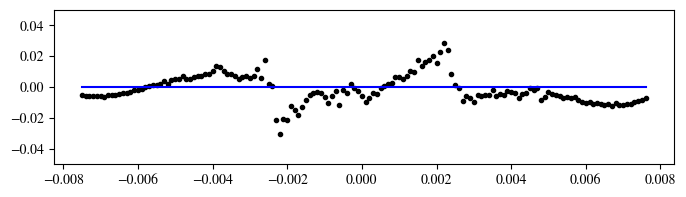

In [8]:
#Residuales feynamn-fresnel
residuals_f_f= f_f_der(data_z, *parametros_f)-data_I

plt.figure(figsize=(8,2))
plt.ylim(-0.05,0.05)
plt.scatter(data_z, residuals_f_f, marker='.',c='black')
plt.plot(data_z,np.zeros(len(data_z)),c='blue')
plt.savefig('Residuales_rendija_der_f.png', dpi=600)

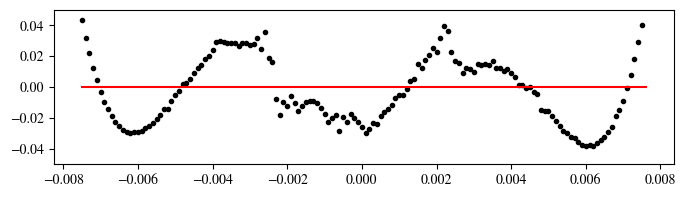

In [11]:
#Residuales fraunhofer
residuals_f_fr= f_fr_sencilla(data_z, *parametros_fr)-data_I

plt.figure(figsize=(8,2))
plt.ylim(-0.05,0.05)
plt.scatter(data_z, residuals_f_fr, marker='.',c='black')
plt.plot(data_z,np.zeros(len(data_z)),c='red')
plt.savefig('Residuales_rendija_der_fr.png',dpi=600)